# Visualization with Seaborn

Matplotlib ha demostrado ser una herramienta de visualización increíblemente útil y popular, pero incluso los usuarios ávidos admitirán que a menudo deja mucho que desear.
Hay varias quejas válidas sobre Matplotlib que a menudo surgen:

- Antes de la versión 2.0, los valores predeterminados de Matplotlib no son exactamente las mejores opciones. Se basó en MATLAB alrededor de 1999, y esto se nota a menudo.
- La API de Matplotlib tiene un nivel relativamente bajo. Es posible hacer una visualización estadística sofisticada, pero a menudo requiere una *mucha* de código repetitivo.
- Matplotlib es anterior a Pandas en más de una década y, por lo tanto, no está diseñado para usarse con Pandas ``DataFrame``s. Para visualizar datos de un ``DataFrame`` de Pandas, debe extraer cada ``Serie`` y, a menudo, concatenarlas juntas en el formato correcto. Sería mejor tener una biblioteca de gráficos que pueda usar inteligentemente las etiquetas ``DataFrame`` en un gráfico.

Una respuesta a estos problemas es [Seaborn](http://seaborn.pydata.org/). Seaborn proporciona una API además de Matplotlib que ofrece opciones sensatas para el estilo de trazado y los valores predeterminados de color, define funciones simples de alto nivel para tipos de trazados estadísticos comunes y se integra con la funcionalidad proporcionada por Pandas ``DataFrame``s.

## Seaborn versus Matplotlib

Este es un ejemplo de un diagrama de recorrido aleatorio simple en Matplotlib, utilizando su formato y colores de diagrama clásicos.
Empezamos con las típicas importaciones:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Ahora creamos algunos datos de caminata aleatoria:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

Y hacer una trama simple:

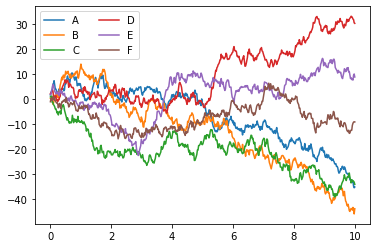

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Aunque el resultado contiene toda la información que nos gustaría que transmitiera, lo hace de una manera que no es del todo agradable estéticamente e incluso parece un poco anticuado en el contexto de la visualización de datos del siglo XXI.

Ahora echemos un vistazo a cómo funciona con Seaborn.
Como veremos, Seaborn tiene muchas de sus propias rutinas de trazado de alto nivel, pero también puede sobrescribir los parámetros predeterminados de Matplotlib y, a su vez, obtener scripts de Matplotlib incluso simples para producir resultados muy superiores.
Podemos configurar el estilo llamando al método ``set()`` de Seaborn.
Por convención, Seaborn se importa como ``sns``:

In [5]:
!pip install seaborn

     |████████████████████████████████| 292 kB 8.0 MB/s eta 0:00:01


In [10]:
import seaborn as sns
sns.set()

Ahora volvamos a ejecutar las mismas dos líneas que antes:

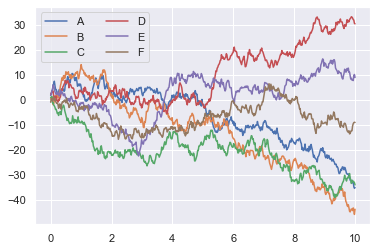

In [11]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

La idea principal de Seaborn es que proporciona comandos de alto nivel para crear una variedad de tipos de gráficos útiles para la exploración de datos estadísticos e incluso algunos ajustes de modelos estadísticos.

Echemos un vistazo a algunos de los conjuntos de datos y tipos de gráficos disponibles en Seaborn. Tenga en cuenta que todo lo siguiente *podría* hacerse usando comandos sin procesar de Matplotlib (esto es, de hecho, lo que Seaborn hace bajo el capó), pero la API de Seaborn es mucho más conveniente.

### Histograms, KDE, and densities

A menudo, en la visualización de datos estadísticos, todo lo que desea es trazar histogramas y distribuciones conjuntas de variables.
Hemos visto que esto es relativamente sencillo en Matplotlib:

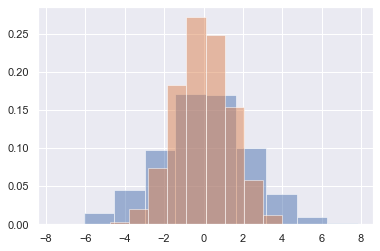

In [21]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], alpha=0.5, density= True)

En lugar de un histograma, podemos obtener una estimación fluida de la distribución mediante una kernel density estimation, lo que hace Seaborn con ``sns.kdeplot``:

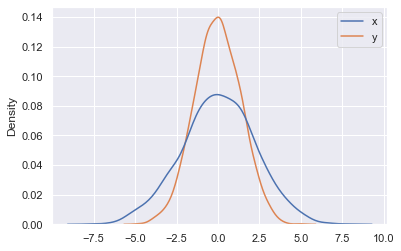

In [62]:
sns.kdeplot(data=data, shade=False);

Los histogramas y KDE se pueden combinar usando ``histplot``:

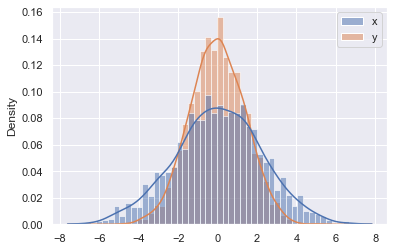

In [63]:
sns.histplot(data=data, kde=True, stat='density');

Si pasamos el conjunto de datos bidimensional completo a ``kdeplot``, obtendremos una visualización bidimensional de los datos:

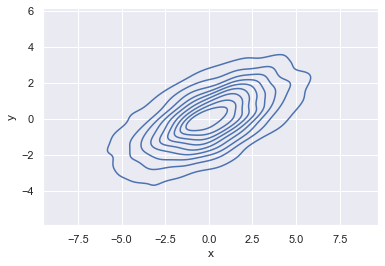

In [57]:
sns.kdeplot(data=data,x='x',y='y');

Podemos ver la distribución conjunta y las distribuciones marginales juntas usando ``sns.jointplot``.
Para este gráfico, estableceremos el estilo en un fondo blanco:

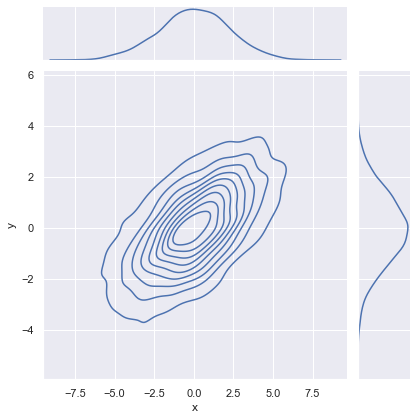

In [66]:
sns.jointplot(data=data,x='x',y='y',kind="kde");

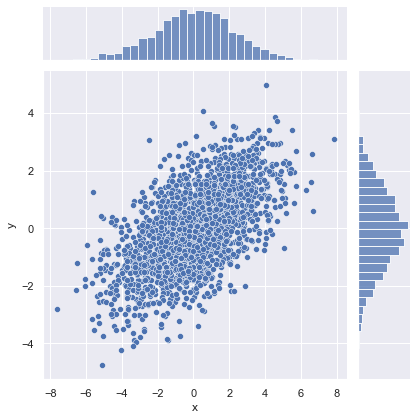

In [67]:
sns.jointplot(data=data,x='x',y='y');

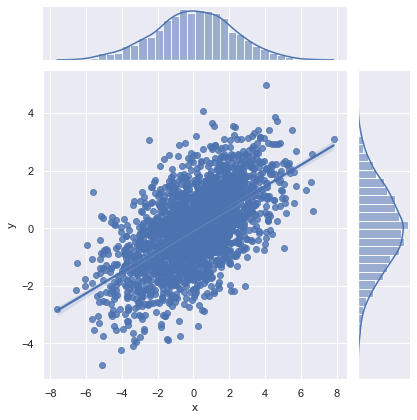

In [76]:
sns.jointplot(data=data,x='x',y='y',kind="reg");

### Pair plots

Cuando generaliza gráficos conjuntos a conjuntos de datos de dimensiones más grandes, termina con *gráficos de pares*. Esto es muy útil para explorar correlaciones entre datos multidimensionales, cuando desea trazar todos los pares de valores entre sí.

Haremos una demostración de esto con el conocido conjunto de datos Iris, que enumera las medidas de los pétalos y sépalos de tres especies de iris:

In [69]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizar las relaciones multidimensionales entre las muestras es tan fácil como llamar a ``sns.pairplot``:

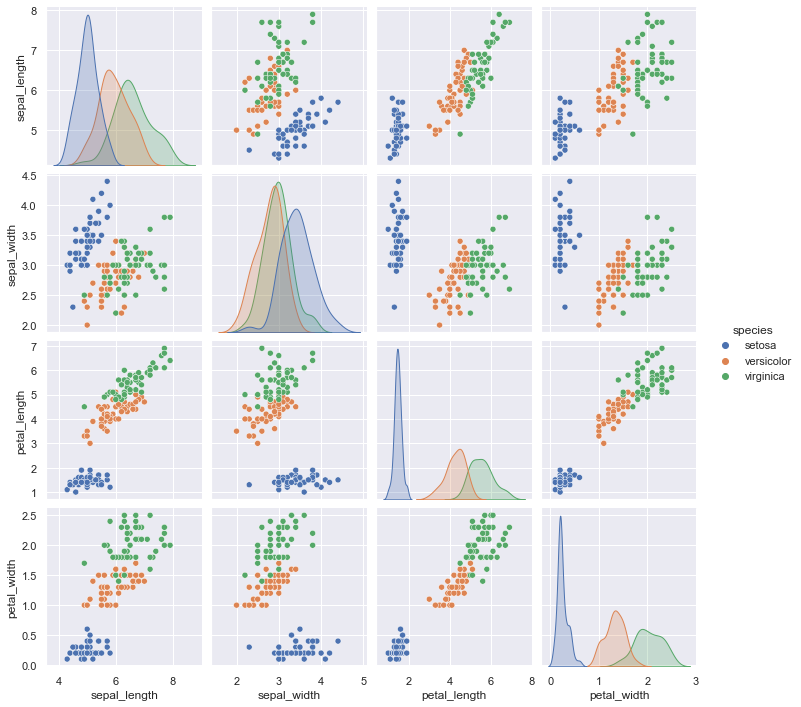

In [73]:
sns.pairplot(iris, hue='species',height=2.5);

# Countplot

In [77]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


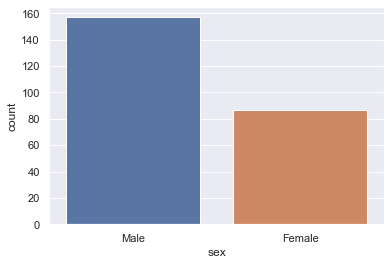

In [79]:
sns.countplot(x='sex',data=df);

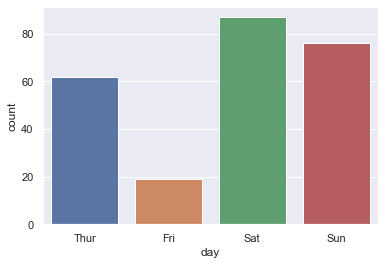

In [82]:
sns.countplot(x='day',data=df);

## Gráfico de barras

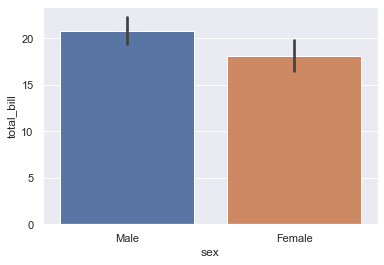

In [84]:
sns.barplot(x='sex',y='total_bill',data=df);

## Boxplot

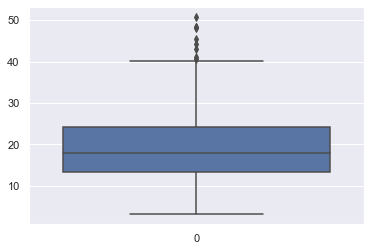

In [92]:
sns.boxplot(data=df["total_bill"]);

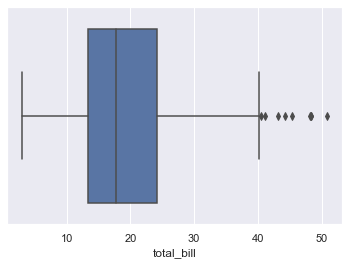

In [93]:
sns.boxplot(x=df["total_bill"]);

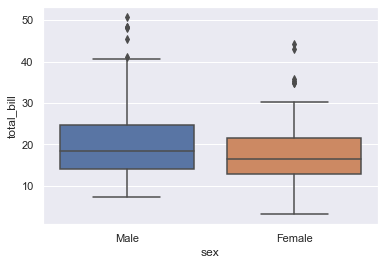

In [88]:
sns.boxplot(data=df, x='sex', y='total_bill');

## Gráfico de regresión

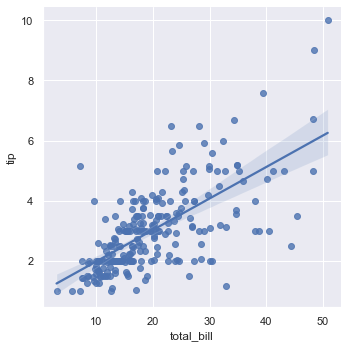

In [95]:
sns.lmplot(x='total_bill',y='tip',data=df);